# Introduction

Cet article est le troisième de la série intitulée "Machine Learning pour débutant". Dans ce tutoriel, nous allons parler de la régression linéaire avec plusieures variables plus connu sous le nom de "Multivariate linear regression" . Pour ce faire, aprés avoir explorer les données, nous allons représenter le modèle et la fonction d'erreur avant d'entrainer le modèle et de trouver l'équation normale.

# 1- Exploration des données

Dans cet article, Nous allons réaliser un modèle qui permet de prédire le prix d’une maison à partir de sa surface en metre carré et du nombre de chambres. Pour ce faire, nous disposons d’un dataset qui contient les informations (surface, nombre de chambres, et prix) de plusieurs maison.

Le dataset a été téléchargé depuis Coursera. Il s’agit d’un fichier csv(houses-pricing.txt) qui contient trois champs qui portent sur les  différentes maisons. Chaque ligne représente une maison.

Les trois champs sont :

*   Le premier champ représente la surface de la maison en metre carré.
*   Le deuxième champ représente le nombre de chambres de la maison.
*   Le troisième champ représente le prix de la maison en (1000$)

Maintenant, recupérons le dataset pour voir à quoi ils ressemblent.

In [ ]:
from google.colab import files
files.upload()

import numpy as np
tab = np.genfromtxt('houses-pricing.txt', delimiter=',')

# recuperation des surfaces des maisons
x1 = tab[:,0];
 
# recuperation des nombres de chambres pour chaque maisons
x2 = tab[:,1];

# recuperation des prix des maisons
Y = tab[:,2];

 
dataset = np.ones((np.size(x1),3))
dataset[:,0] = x1
dataset[:,1] = x2
dataset[:,2] = Y
 
# on affiche les 10 premiers maisons
print(dataset[0:9,:])

Saving houses-pricing.txt to houses-pricing.txt
[[2.10400e+03 3.00000e+00 3.99900e+05]
 [1.60000e+03 3.00000e+00 3.29900e+05]
 [2.40000e+03 3.00000e+00 3.69000e+05]
 [1.41600e+03 2.00000e+00 2.32000e+05]
 [3.00000e+03 4.00000e+00 5.39900e+05]
 [1.98500e+03 4.00000e+00 2.99900e+05]
 [1.53400e+03 3.00000e+00 3.14900e+05]
 [1.42700e+03 3.00000e+00 1.98999e+05]
 [1.38000e+03 3.00000e+00 2.12000e+05]]


On a recupéré les surfaces des maisons (x1), les nombres de chambres pour chaque maisons (x2) et les prix des maisons correspondantes (Y) qu’on a mis sur un tableau à trois colonnes qui se nomme “dataset”.

On nomme m le nombre d’exemples (de maisons) dans le dataset. On obtient ainsi l’ensemble $$E_m = \{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),...,(x^{(m)},y^{(m)})\} $$

$$avec \: \: \: \: x^{(i)}=\begin{pmatrix}
x^{(i)}_{1}\\ 
x^{(i)}_{2}
\end{pmatrix} \: \forall \: 0 < i \leq m $$

De ce fait $$ (x^{(i)},y^{(i)}) $$ représente la i-ème ligne de la table “dataset” :  
* la surface $$ x^{(i)}_1 $$ de la i-ème maison
* le nombre de chambres $$ x^{(i)}_2 $$ de la i-ème maison 
* et le prix $$ y^{(i)} $$ de la i-ème maison.

Ici, X est un vecteur de dimension 2 contrairement à l'article précédent ou X était un sacalaire. ce qui veut dire qu'on fait une régréssion avec 2 variables.

Si on représente vectoriellement tout le dataset, on aura :

$$ \forall \: x^{(i)} \in \: X, \: on \: aura \: \: x^{(i)}=\begin{pmatrix}
x^{(i)}_{0}\\ 
x^{(i)}_{1}\\ 
x^{(i)}_{2}
\end{pmatrix} \: avec \: x^{(i)}_{0} = 1 $$

L’ensemble X va devenir alors : $$ X = \begin{pmatrix}
1 & x^{(1)}_{1} & x^{(1)}_{2}\\ 
1 & x^{(2)}_{1} & x^{(2)}_{2}\\ 
. & . & .\\
. & . & .\\
1 & x^{(m)}_{1} & x^{(m)}_{2}
\end{pmatrix} $$

on modifie la varable dataset afin d’ajouter une colonne (avec des 1) devant. ce qui va nous donner :

In [ ]:
datasetTemp = dataset
 
dataset = np.ones((np.size(x1),4))
dataset[:,1] = datasetTemp[:,0]
dataset[:,2] = datasetTemp[:,1]
dataset[:,3] = datasetTemp[:,2]
 
X = dataset[:,0:3]
Y = dataset[:,3]
 
print(X.shape)
print(X)
print(Y.shape)
print(Y)

(47, 3)
[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]
 [1.000e+00 1.985e+03 4.000e+00]
 [1.000e+00 1.534e+03 3.000e+00]
 [1.000e+00 1.427e+03 3.000e+00]
 [1.000e+00 1.380e+03 3.000e+00]
 [1.000e+00 1.494e+03 3.000e+00]
 [1.000e+00 1.940e+03 4.000e+00]
 [1.000e+00 2.000e+03 3.000e+00]
 [1.000e+00 1.890e+03 3.000e+00]
 [1.000e+00 4.478e+03 5.000e+00]
 [1.000e+00 1.268e+03 3.000e+00]
 [1.000e+00 2.300e+03 4.000e+00]
 [1.000e+00 1.320e+03 2.000e+00]
 [1.000e+00 1.236e+03 3.000e+00]
 [1.000e+00 2.609e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 1.767e+03 3.000e+00]
 [1.000e+00 1.888e+03 2.000e+00]
 [1.000e+00 1.604e+03 3.000e+00]
 [1.000e+00 1.962e+03 4.000e+00]
 [1.000e+00 3.890e+03 3.000e+00]
 [1.000e+00 1.100e+03 3.000e+00]
 [1.000e+00 1.458e+03 3.000e+00]
 [1.000e+00 2.526e+03 3.000e+00]
 [1.000e+00 2.200e+03 3.000e+00]
 [1.000e+00 2.637e+03 3.000e+00]
 [

In [ ]:
print(np.min(X, axis=0))
print(np.max(X, axis=0))
print(np.mean(X, axis=0))

[  1. 852.   1.]
[1.000e+00 4.478e+03 5.000e+00]
[1.00000000e+00 2.00068085e+03 3.17021277e+00]


# 2 - Représentation du modèle et fonction d'erreur

## 2.1 - Représentation du modèle

Aprés avoir explorer notre dataset qui représente les prix de différentes maisons sachant leurs surfaces (en mètre carré) et leurs nombres de chambres.

Pour realiser le modele de régression linéaire, il nous faut trouver (apprendre) une fonction $$ h_{\Theta} : X \rightarrow Y $$

d'une manière plus générale, la fonction hypothèse d'une régression lineaire avec plusieurs variables (Multivariate regression) est : $$ h_{\Theta} (x^{(i)}) = \Theta _{0} + \Theta _{1}x^{(i)}_{1} + \Theta _{2}x^{(i)}_{2} + ... + \Theta _{n}x^{(i)}_{n} $$

Dans notre cas (modèle qui permet de prédire le prix d’une maison à partir de sa surface en metre carré et du nombre de chambres), la fonction h sera linéaire et représenté par : $$ h_{\Theta} (x^{(i)}) = \Theta _{0} + \Theta _{1}x^{(i)}_{1} + \Theta _{2}x^{(i)}_{2} $$

L'écriture vectorielle de la fonction h sera : $$ h_{\Theta} (x^{(i)}) = \Theta^{T} x^{(i)}  $$

$$ avec \, \, \Theta = \begin{pmatrix}
\Theta _{0}\\ 
\Theta _{1}\\ 
\Theta _{2}
\end{pmatrix}
et \, \, x^{(i)} = \begin{pmatrix}
x^{(i)}_{0}\\ 
x^{(i)}_{1}\\ 
x^{(i)}_{2}
\end{pmatrix} $$

$$ x^{(i)} \, \, represente \, une \, maison \, avec \\  x^{(i)}_{0} = 1;\\
x^{(i)}_{1} = surface \, de \, la \, maison \, (en \, m^{2});\\
x^{(i)}_{2} = nombre \, de \, chambres \, de \, la \, maison. $$

On peut ainsi implémenter la fonction python qui correspond à hΘ. Cette fonction prend en paramètres deux vecteurs :

- x (ou une matrice mx3).
- Θ correspondant aux paramètres de notre modèle.

On définit la fonction python qui représente notre modèle de la manière suivante :

In [ ]:
def h_theta(X, theta):
    ret = np.dot(theta, X.T)
    return ret

voyons ce que donne la fonction h_theta sur notre dataset : 

In [ ]:
# pour theta = (0.5, 1, 2)
theta = np.array([0.5, 1, 2])
 
x = np.array([1, 2104, 3])
print("pour theta = (0.5, 1, 2), et x = (1, 2104, 3) h_theta(x) vaut : ", h_theta(x,theta))
 
print("pour theta = (0.5, 1, 2), et X est le dataset,  h_theta(x) vaut : ", h_theta(X,theta))

pour theta = (0.5, 1, 2), et x = (1, 2104, 3) h_theta(x) vaut :  2110.5
pour theta = (0.5, 1, 2), et X est le dataset,  h_theta(x) vaut :  [2110.5 1606.5 2406.5 1420.5 3008.5 1993.5 1540.5 1433.5 1386.5 1500.5
 1948.5 2006.5 1896.5 4488.5 1274.5 2308.5 1324.5 1242.5 2617.5 3039.5
 1773.5 1892.5 1610.5 1970.5 3896.5 1106.5 1464.5 2532.5 2206.5 2643.5
 1843.5 1002.5 2048.5 3143.5 1819.5 1443.5 1245.5 2140.5 4223.5 2170.5
 1668.5 2244.5 2575.5 1206.5  856.5 1860.5 1209.5]


On voit que pour le premier exemple (maison), la surface de la maison est 2104, le nombre de cahmbres est 3, et le prix 399900. Si on utilise notre modèle h_theta pour estimer le prix de cette maison on trouve 2110.5, ce qui veut dire que notre modèle n’est pas encore performant.

## 2.2 - Représentation de la fonction d'erreur

Nous avons vu que notre modèle fait des erreurs dans l’estimation des prix des maisons. Nous pouvons ainsi représenter l'erreur quadratique de notre modèle par la fonction suivante : $$ J(\Theta ) = \frac{1}{2m}\sum ^{m}_{i=1}(h_{\Theta }(x^{(i)}) - y^{(i)})^{2} $$

On peut ainsi implémenter la fonction python qui correspond à la fonction d’erreur J(Θ). Cette fonction prend en paramètres deux vecteurs :

- x (ou une matrice mx3).
- Θ correspondant aux paramètres de notre modèle.
- Un vecteur Y (ou un scalaire yi).

In [ ]:
def computeErrorFunction(x, y, theta):
    h_theta_de_x = h_theta(x,theta)
    #print(h_theta_de_x.shape)
    #print(y.shape)
    vec_temp =  (h_theta_de_x - y)**2
    #print(vec_temp.shape)
    ret = np.sum(vec_temp)/(2*(y.size))
    return ret

On peut calculer l’erreur :

In [ ]:
theta = np.array([0.5, 1, 2])
print("pour theta = (0.5, 1, 2), l'erreur de notre modèle sur notre dataset est :", computeErrorFunction(X, Y, theta))
 
theta = np.array([1200, 30000, 45000])
print("pour theta = (1200, 300, 450), l'erreur de notre modèle sur notre dataset est :", computeErrorFunction(X, Y, theta))

pour theta = (0.5, 1, 2), l'erreur de notre modèle sur notre dataset est : 64827252828.65691
pour theta = (1200, 300, 450), l'erreur de notre modèle sur notre dataset est : 2065558659029510.2


# 3 - Entrainement du modèle

## 3.1 - Descente de gradient

si nous avons un modèle de regression de n variables alors nous a n+1 paramètres theta. l'entrainement du modèle consistera à minimiser la fonction d'erreur $$ \underset{\Theta_{0}, \Theta_{1},...,\Theta_{n+1}}{min}J(\Theta) $$

ce qui reviendrait à faire le traitement suivant : 

repeter {$$ 
\Theta_0 := \Theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right ) \\ 
\Theta_1 := \Theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_1 \\ 
.\\
.\\
.\\
\Theta_n := \Theta_n - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_n \\
$$

}

Dans notre cas (modèle qui permet de prédire le prix d’une maison à partir de sa surface en metre carré et du nombre de chambres), le traitement sera  :

repeter {$$ 
\Theta_0 := \Theta_0 - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right ) \\ 
\Theta_1 := \Theta_1 - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_1 \\ 
\Theta_2 := \Theta_2 - \alpha \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_2 \\
$$

}

Sachant que les dérivés partielles par rapport au différents paramètres sont les suivants : $$ \frac{\partial}{\partial \Theta_0}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )  \\
\frac{\partial}{\partial \Theta_1}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_1 \\
\frac{\partial}{\partial \Theta_2}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}\left ( h_\Theta (x^{(i)}) - y^{(i)} \right )x^{(i)}_2 
$$

Nous pouvons réécrire vectoriellement nos paramètres et nos gradients par  : $$ \Theta =\begin{pmatrix}
\Theta _{0}\\ 
\Theta _{1}\\ 
\Theta _{2}
\end{pmatrix} \hspace{0.2cm} et \hspace{0.2cm} \triangledown J(\Theta ) = \begin{pmatrix}
{\frac{\partial}{\partial \Theta_0}J(\Theta)} \\ 
{\frac{\partial}{\partial \Theta_1}J(\Theta)} \\
{\frac{\partial}{\partial \Theta_2}J(\Theta)}
\end{pmatrix}$$

le traitement va devenir repeter {$$ \Theta = \Theta  - \alpha\triangledown J(\Theta ) $$

}

Ainsi, on implémente la fonction python qui calcule les gradients et qui recoit en paramètre les éléments suivants: 
- une matrice mx3.
- Θ correspondant aux paramètres de notre modèle.
- Un vecteur Y (ou un scalaire yi).

cette fonction va retourner le vercteur de gradient $$ \triangledown J(\Theta ) $$

In [ ]:
def computeGradient(x, y, theta):
    h_theta_de_x = h_theta(x,theta)
    vec_temp =  (h_theta_de_x - y)
    ret = np.dot(x.T,vec_temp)/y.size
    return ret

Nous pouvons donc calculer le vecteur des gradients pour voir ce que celà donne :


In [ ]:
theta = np.array([0.5, 1, 2])
print("pour theta = (0.5, 1), le vecteur des gradients est :", computeGradient(X, Y, theta))

pour theta = (0.5, 1), le vecteur des gradients est : [-3.38405138e+05 -7.59573941e+08 -1.11367086e+06]


A l'image de la fonction de calcul de gradient, la fontion d'entrainement du modèle est pareil que pour une régression linéaire avec une seule variable. La fonction sera défini ainsi : 

In [ ]:
import matplotlib.pyplot as plt
np.seterr(all='warn')
np.set_printoptions(suppress=True)
def trainModel(x, y, nb_epoch, alpha=0.01):
    # on choisi des valeurs arbitraires pour le vecteur theta
    theta = np.random.rand(3)
    scem = np.zeros((nb_epoch//1000, 2))
    print("theta ", theta)
    # on itere sur le nombre d'epoques
    for i in range(nb_epoch+1):
        grad = computeGradient(x, y, theta)
        theta = theta - alpha*grad
        if i%1000 == 0 : 
            err = computeErrorFunction(x, y, theta)
            print("theta ", theta)
            print("gradient :", grad)
            print("h_theta : ",h_theta(x,theta))
            print("Epoque ", i)
            print("l'erreur est : ", err)
            l = (i//1000) - 1 
            scem[l, 0] = i
            scem[l, 1] = err
    print(scem)   
    plt.plot(scem[:,0], scem[:,1], linestyle='solid')
    plt.show()
    
    return theta

Entrainons notre modèle (sur 2000 époques par exemple) en éxecutant le code suivant :

theta  [0.75311316 0.37622973 0.84192724]
theta  [   3397.31833077 7624635.43252821   11179.29603357]
gradient : [-3.39656522e+05 -7.62463506e+08 -1.11784541e+06]
h_theta :  [1.60422699e+10 1.21994536e+10 1.82991620e+10 1.07965095e+10
 2.28739544e+10 1.51349494e+10 1.16962277e+10 1.08803917e+10
 1.05220338e+10 1.13912423e+10 1.47918409e+10 1.52493078e+10
 1.44105979e+10 3.41431768e+10 9.66807466e+09 1.75367096e+10
 1.00645445e+10 9.42408633e+09 1.98927220e+10 2.31103181e+10
 1.34727677e+10 1.43953375e+10 1.22299522e+10 1.49595828e+10
 2.96598688e+10 8.38713591e+09 1.11167554e+10 1.92598660e+10
 1.67742349e+10 2.01062006e+10 1.40217303e+10 7.62465001e+09
 1.55543044e+10 2.39185183e+10 1.38082629e+10 1.09566381e+10
 9.44696024e+09 1.62557709e+10 3.21378865e+10 1.64845099e+10
 1.26874191e+10 1.70639710e+10 1.95724873e+10 9.14959945e+09
 6.49621514e+09 1.41208729e+10 9.17247336e+09]
Epoque  0
l'erreur est :  1.3431116615957727e+20
theta  [nan nan nan]
gradient : [nan nan nan]
h_theta :  [n

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


theta  [nan nan nan]
gradient : [nan nan nan]
h_theta :  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
Epoque  10000
l'erreur est :  nan
theta  [nan nan nan]
gradient : [nan nan nan]
h_theta :  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
Epoque  11000
l'erreur est :  nan
theta  [nan nan nan]
gradient : [nan nan nan]
h_theta :  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan]
Epoque  12000
l'erreur est :  nan
theta  [nan nan nan]
gradient : [nan nan nan]
h_theta :  [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan 

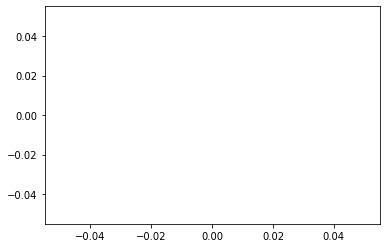

In [ ]:
theta_train = trainModel(X, Y, 15000, 0.01)

Nous constatons que notre modèle ne converge pas, au contraire l'erreur augmente au fure et à mesure que l'entrainement avance.
Pourquoi ce comportement ? 
c'est ce que nous allons voire dans section suivante.

## 3.2 - Normalisation

Nous avons l'impression que l'erreur s'augmente au fure et à mesure que l'entrainement avance alors que ca devrai etre le contraire.

Cette situation s'explique du fait que le gradient oscille : c'est-à dire qu'elle prend des valeurs (positives ou négatives) avec des valeurs absolus trés grandes.

Ce phénomène est causé par le fait que les deux variables ne sont pas dans une meme echelle : 
* la surface $$ x_{1}^{(i)} \, est \, de \, tel \, sorte\, que\, \, \, 852 \leq x_{1}^{(i)}\leq 4478$$ 
* le nombre de chambres $$ x_{2}^{(i)} \, est \, de \, tel \, sorte\, que\, \, \, 1 \leq x_{2}^{(i)}\leq 5 $$

Lors d'une regression lineaire avec plusieurs varables, pour que descente de gradient se passe bien, il faut que tous les caracteristiques (variables) aient des valeurs dans le meme echelle. cela signifie que $$ \forall \, x_{j}^{(i)} \, nous \, devons \, avoir \, \, \, -1 \leq x_{j}^{(i)}\leq 1\, \, ou \, bien\, -0,5 \leq x_{j}^{(i)}\leq 05 $$ 

Pour avoir cette uniformisation, il nous faudra faire un redimensionnement de caractéristiques (qui est aussi appelé Feature scalling).
Le redimensionnement de caractéristiques le plus utilisé est la "normalisation moyenne" (mean normalization).

La "normalisation moyenne" consiste à faire : $$ \forall \, x_{j}^{(i)} \, on \, fait \,\, \, \,  x_{j}^{(i)} = \frac{x_{j}^{(i)} - \mu _{i}}{s_{i}} \\
avec \, \mu _{i} = moyenne \, des\, x_{j}^{(i)}\\
et \, s_{i} = \underset{i}{max}(x_{j}^{(i)}) - \underset{i}{min}(x_{j}^{(i)}) $$

Maintenant, appliquons la "normalisation moyenne" à nos deux caractéristiques à savoire les nombres de chambres et les surfaces des maisons. Pour ce faire, nous allons dèja créer une fonction qui permet de normaliser nos deux caractéristiques.

In [ ]:
mu = np.zeros(np.size(X, 1))
s = np.zeros(np.size(X, 1))
mu = np.mean(X, axis=0, dtype=int)
min = np.min(X, axis=0)
max = np.max(X, axis=0)
s = max - min

def normalize(X, mu, s):
    X_norm = X

    for i in range(np.size(X_norm,0)) : 
      X_norm[i,:] = X_norm[i,:] - mu
      for j in range(np.size(X_norm,1)) : 
        X_norm[i,j] = X_norm[i,j]/s[j]

    # nous remettons les 1 à leurs places
    X_norm[:,0] = np.ones(np.size(X_norm,0),dtype=int)
    return X_norm

#X_norm = normalize(X, mu, s)
#print(mu)
#print(min)
#print(max)
#print(s)
#print(X_norm[0:9,:])

In [ ]:
X_norm = normalize(X, mu, s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


theta  [0.92497256 0.30792978 0.60657798]
theta  [3405.04205988  230.26850794  248.43019664]
gradient : [-340411.70873226  -22996.05781648  -24782.36186608]
h_theta :  [3411.64656204 3379.6401285  3430.44399126 3305.84769091 3530.65443749
 3466.19703662 3375.44880983 3368.65379318 3365.66906625 3372.90861669
 3463.33931934 3405.04205988 3398.05652875 3686.62212309 3358.55652546
 3486.20105758 3299.75122738 3356.52437095 3505.82404957 3532.62308717
 3390.24543485 3335.82196993 3379.89414782 3464.73642556 3525.06618564
 3347.88771428 3370.62244286 3438.44559964 3417.74302557 3445.4946356
 3332.71023334 3217.32213311 3469.68980218 3477.24704982 3455.14719647
 3369.28884147 3356.71488543 3475.5322464  3607.81280405 3477.43739125
 3321.59688836 3420.15620905 3503.15684677 3354.23819712 3270.03096767
 3457.75089443 3354.42871161]
Epoque  0
l'erreur est :  64426813706.638954
theta  [337221.03825946 173547.3435808   77978.38825689]
gradient : [   159.24533617 -12998.24962174  -3566.18662974]
h

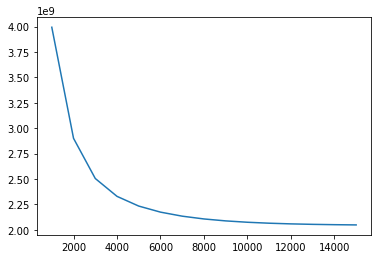

In [ ]:
theta_train = trainModel(X_norm, Y, 15000, 0.01)

# 4 - Regréssion polynomiale

Lorsqu'on effectue une régression lineaire, il peut arriver que le modèle linéaire qu'on a appris ne puisse pas pemettre de faire les prédiction attendu.

En visualisant les données, on se rend compte que l'affiche des données prend la forme d'une courbe au lieu d'une droite.
sachant qu'une fonction linéaire ne peut représenter qu'une droite; un modeèle linéaire ne peut pas apprendre nos données correctement (c'est ce qui explique les disfonctionnements de notre modèle)

pour apprendre un modèle à partir de ces données (sous forme de courbe), il nous faut faire une regréssion polynomiale en lieu et place de la regréssion linéaire.

la régression polynomiale consiste à modifier fonction linéaire en fonction polynamiale en créant de nouvelle caractéristiques à partie des caractéristiquers existants.
cette modification (transfomation) nous donnera une fonction quadratique, cubique, racine carrée, etc.

Par exemple, supposons qu'on ait le modèle de regréssion suivant : $$ h_{\Theta} (x) = \Theta _{0} + \Theta _{1}x_{1}  $$

nous pouvons créer des caractéristiques additionnelles à partir de x. 

Pour avoir la fonction quadratique, on fait : $$ h_{\Theta} (x) = \Theta _{0} + \Theta _{1}x_{1}  + \Theta _{2}(x_{1})^2$$ 



Pour avoir la fonction cubique, on fait : $$ h_{\Theta} (x) = \Theta _{0} + \Theta _{1}x_{1}  + \Theta _{2}(x_{1})^2 + \Theta _{3}(x_{1})^3$$ 

Dans le modèle cubique nous avons créer deux nouveaux caractéristiques qui sont : $$ x_{2} = (x_{1})^2 \,\, et \,\, x_{3} = (x_{1})^3$$ 

Dans une regréssion polynomiale, il faut toujours faire du  redimensionnement de caractéristiques (Feature scalling).

# 5 - Equation normale

La descente de gradient est un moyen de minimiser le fonction d'erreur J_theta.
Cependant, il existe une seconde manière de minimiser la fonction d'erreur. cette manière de faire est appelé Equation Normale. Cette manière de faire permet d'effectuer la minimisation explicitement et sans recourir à un algorithme itératif. Dans la méthode "Équation normale", nous minimiserons J en prenant explicitement ses dérivés par rapport aux θj, et en les mettant à zéro. Cela nous permet de trouver le thêta optimal sans itération. 
La formule d’équation normale est donnée ci-dessous :

$$ \theta  = (X^{T}X)^{-1}X^{T}y $$

*   X est une matrice mxn qui est composé par l'ensemble des exemples d'entrainement sans les target : dans notre cas, chaque ligne représente un maison.
*   y est un vecteur de dimesion m qui représente l'ensemble des target : chaque élément de ce vecteur représente le prix d'une maison.

Nous pouvons définir la fonction qui calcule theta en utilisant l'equation normale. 
cette fonction va recevoire les paramètres suivants : 
- une matrice mx3.
- Un vecteur y.

In [ ]:
def equationNormale(X, y):
    matM = np.dot(X.T, X)
    matInv = np.linalg.inv(matM)
    mat = np.dot(matInv, X.T)
    theta = np.dot(mat, y)
    return theta

In [ ]:
theta = equationNormale(X, Y)

print(theta)

[341805.20024107 504777.90398791 -34952.07644931]


avec l'equation Normale, on a pas besoin de choisir un learning rate ni de faire plusieurs itération comme on le ferait sur un descente de gradient.

Par contre, si on a un nombre de feature trés grand (>10000), faire une descente de gradient ira beaucoup plus vite que de calculer l'équation normale.
En plus, l'equation normale ne fonctionne que pour la regréssion linéaire mais pas pour les autres algorithme plus complexes (classification, regression logistique, reseau de neurone, etc.).

# 6 - Conclusion